# Data generator applied to structural MRI

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


Load data and verify shape

In [2]:
data = np.load('/home/aulloa/Documents/data/mcic_mega/mcic_mega_smri_data_masked.npy')
label = np.load('/home/aulloa/Documents/data/mcic_mega/mcic_mega_smri_label.npy')
mask = np.load('/home/aulloa/Documents/data/mcic_mega/mcic_mega_smri_mask.npy')

print(data.shape)
print(data.dtype)
print(mask.shape)
print(mask.dtype)
print(mask.sum())

(692, 92354)
float32
(52, 63, 45)
bool
92354


In [3]:
lit_label = []
for x in label:
    if x == 1:
        lit_label.append('HC')
    if x == 0:
        lit_label.append('SZ')

lit_label = np.array(lit_label)    

# quality control

616

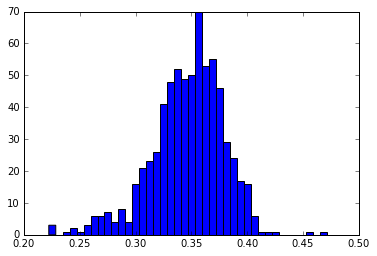

In [4]:
temp = data.mean(axis=1)
plt.hist(temp, 40);
keep = [n for n,x in enumerate(data.mean(axis=1)) if x > 0.3 and x < 0.4]
len(keep)

In [5]:
data = data[keep]
label = label[keep]
lit_label = lit_label[keep]

## Draw a brain for visual inspection

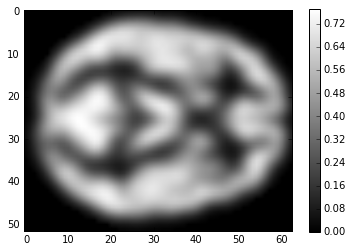

In [6]:
def draw_brain(masked, mask):
    temp = np.zeros(mask.shape)
    temp[mask] = masked
    plt.imshow(temp[:,:,20], cmap='gray')
    plt.colorbar()

draw_brain(data[0,:], mask)

Generate 100 samples and save them on the iterator gen.

In [7]:
np.unique(lit_label)

array(['HC', 'SZ'], 
      dtype='<U2')

In [8]:
from data_generator import DataGeneratorByGroup as dbg

gen = dbg(data, lit_label, n_components=20, n_samples=100, 
          n_batches=1, method='normal')

gen.mixing.shape

INFO:data_generator.generator:Classes: ['HC' 'SZ']


Step 74: Lrate 8.5e-07,Wchange 8.9e-07,Angle 93.74


(616, 20)

In [15]:
new_data, new_label = next(iter(gen))
print('New data shape: {}'.format(new_data.shape))
print('New data labels: {}'.format(np.unique(new_label)))
print(len(new_label))

New data shape: (200, 92354)
New data labels: ['HC' 'SZ']
200


Draw a couple of fake brains for visual inspection

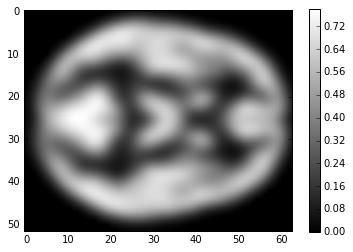

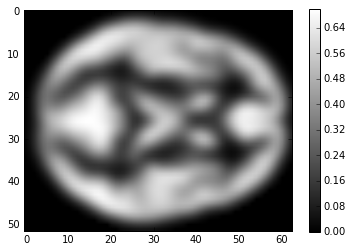

In [16]:
draw_brain(new_data[0,:] - new_data[0,:].min(), mask)
plt.figure()
draw_brain(new_data[2,:] - new_data[1,:].min(), mask)

Visually the fake data is very similar to original data. Using the correlation matrix of the fake data we can observe that there is some variability among different samples.

In [ ]:
C = np.corrcoef(new_data)
plt.imshow(C)
plt.colorbar()